<a href="https://colab.research.google.com/github/shatakshii25/Python-and-ML-Practice-Notebooks/blob/main/class11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Multi Linear Regression 

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('/content/CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
# EDA, data cleaning and pre-processing of data

In [5]:
df.shape

(205, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
# To check for missing data/null values
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
# Exploratory Data Analysis (EDA)
# Data visualisation library based on matplotlib
import seaborn as sns

In [9]:
np.min(df['price'])

5118.0

In [10]:
np.max(df['price'])

45400.0

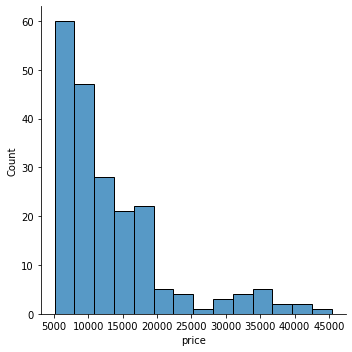

In [11]:
sns.displot(df['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


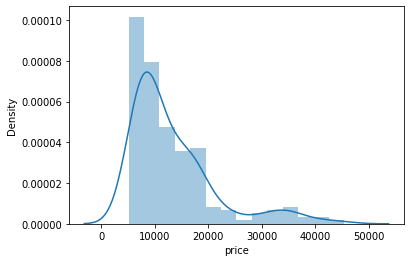

In [12]:
sns.distplot(df['price'])

In [13]:
# pre-processing
# selecting only the numerical columns
cars_numeric = df.select_dtypes(include=['float','int64'])
cars_numeric

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [14]:
# drop unwanted columns
cars_numeric = cars_numeric.drop(['car_ID','symboling'], axis=1)
cars_numeric

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [15]:
x = cars_numeric.iloc[:,0:13]
x

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27


In [16]:
x = cars_numeric.iloc[:,0:13].values
x

array([[  88.6,  168.8,   64.1, ..., 5000. ,   21. ,   27. ],
       [  88.6,  168.8,   64.1, ..., 5000. ,   21. ,   27. ],
       [  94.5,  171.2,   65.5, ..., 5000. ,   19. ,   26. ],
       ...,
       [ 109.1,  188.8,   68.9, ..., 5500. ,   18. ,   23. ],
       [ 109.1,  188.8,   68.9, ..., 4800. ,   26. ,   27. ],
       [ 109.1,  188.8,   68.9, ..., 5400. ,   19. ,   25. ]])

In [17]:
# 'x' needs to be 2D so we check its dimensions
x.ndim

2

In [18]:
y = cars_numeric.iloc[:,-1].values
y

array([13495.   , 16500.   , 16500.   , 13950.   , 17450.   , 15250.   ,
       17710.   , 18920.   , 23875.   , 17859.167, 16430.   , 16925.   ,
       20970.   , 21105.   , 24565.   , 30760.   , 41315.   , 36880.   ,
        5151.   ,  6295.   ,  6575.   ,  5572.   ,  6377.   ,  7957.   ,
        6229.   ,  6692.   ,  7609.   ,  8558.   ,  8921.   , 12964.   ,
        6479.   ,  6855.   ,  5399.   ,  6529.   ,  7129.   ,  7295.   ,
        7295.   ,  7895.   ,  9095.   ,  8845.   , 10295.   , 12945.   ,
       10345.   ,  6785.   ,  8916.5  ,  8916.5  , 11048.   , 32250.   ,
       35550.   , 36000.   ,  5195.   ,  6095.   ,  6795.   ,  6695.   ,
        7395.   , 10945.   , 11845.   , 13645.   , 15645.   ,  8845.   ,
        8495.   , 10595.   , 10245.   , 10795.   , 11245.   , 18280.   ,
       18344.   , 25552.   , 28248.   , 28176.   , 31600.   , 34184.   ,
       35056.   , 40960.   , 45400.   , 16503.   ,  5389.   ,  6189.   ,
        6669.   ,  7689.   ,  9959.   ,  8499.   , 

In [19]:
# x       y
# training (model.fit)[x and y is used for training a model]
# testing  (model.predict)[only x is used for testing]

In [20]:
# x, y
# x_train, x_test, y_train, y_test 

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [22]:
# import the algorithm
# call the algorithm
# fit 
# predict
# plot the graphs to compare the predictions
# r2_score

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [24]:
model.fit(x_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(x_test)
y_pred # predicted output 

array([ 6235.42500602, 19790.61817546, 14979.27612129, -1134.1351902 ,
       11132.32548236, 13518.17757352,  5683.20921384,  6283.89365797,
       23126.98530885,  8202.87829636, 16141.08746789, 37186.620833  ,
        9399.71398237, 14235.89743835,  5757.94201887, 13165.16702932,
       11152.82221655, 18568.63307141, 10141.86686901,  6287.15927099,
       10682.51479525, 17992.19878976, 10833.41323372, 13614.7038942 ,
       21454.99910165,  8202.97012341,  6873.2042475 , 17805.91105615,
        6902.39516583,  5801.50097042,  9649.90265499, 11070.09789029,
       21045.77815857,  8246.11235138,  5936.63781937, 26615.14377317,
       10378.97946806, 16778.39190457,  6689.66441559, 37043.76928874,
        5661.41569819, 15623.82529796, 30395.98293889, 17901.79311012,
       11439.71150878,  7274.32045138,  6977.32359472, 15485.01565233,
       10277.75067436,  9831.92371684, 18843.28365874,  6807.29317223])

In [26]:
y_test # actual output used to compare with predicted output(y_pred)

array([ 6795. , 15750. , 15250. ,  5151. ,  9995. , 11199. ,  5389. ,
        7898. , 17199. ,  6529. , 20970. , 31400.5, 10945. , 18344. ,
        8916.5,  9989. ,  9295. , 18920. ,  7895. ,  6488. ,  9959. ,
       15580. ,  9895. , 11549. , 15998. ,  5118. ,  6938. , 16695. ,
        8358. ,  5499. ,  7975. , 12290. , 22018. ,  8948. ,  6849. ,
       41315. , 11595. , 18150. ,  6377. , 45400. ,  8916.5, 17450. ,
       34184. , 15040. , 11259. ,  7609. ,  7609. , 14869. , 11694. ,
        8495. , 23875. ,  7099. ])

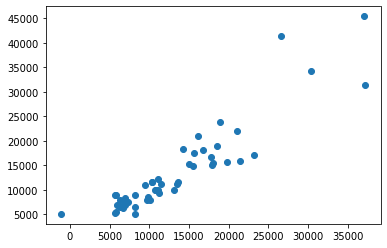

In [27]:
import matplotlib.pyplot as plt
plt.scatter(y_pred, y_test) 

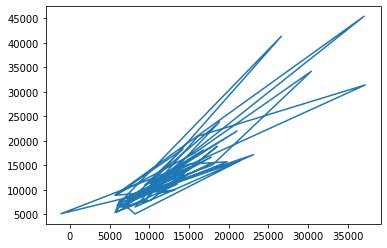

In [28]:
# matplotlib gives multiple linear regression lines which is not easy to look at and understand hence we can choose to use seaborn or pandas plotting
plt.plot(y_pred, y_test)

In [29]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,6795.0,6235.425006
1,15750.0,19790.618175
2,15250.0,14979.276121
3,5151.0,-1134.135190
4,9995.0,11132.325482
5,11199.0,13518.177574
6,5389.0,5683.209214
7,7898.0,6283.893658
8,17199.0,23126.985309
9,6529.0,8202.878296


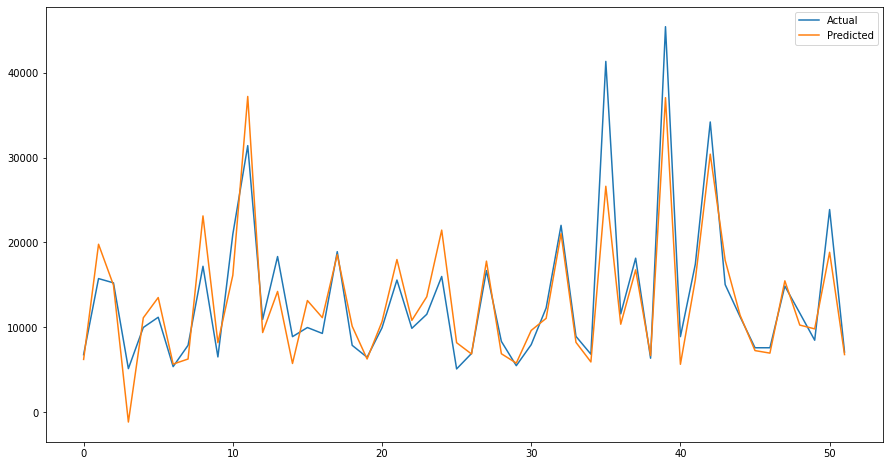

In [30]:
# pandas plotting of a line graph
df1.plot(figsize=(15,8))

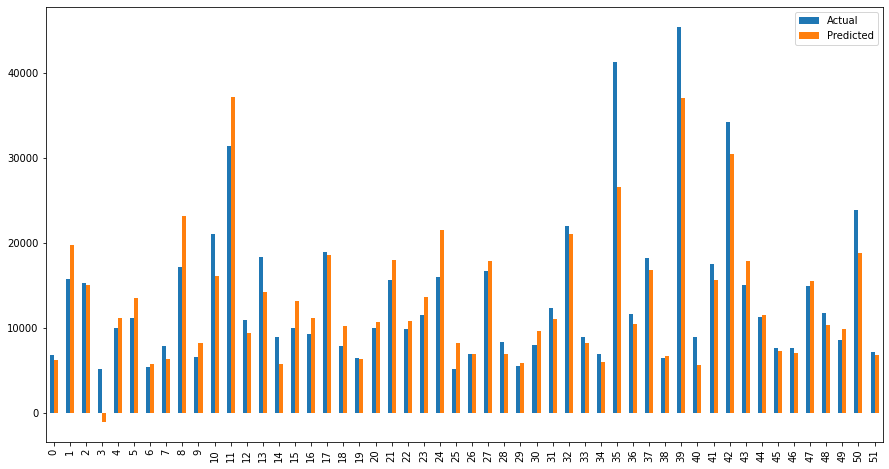

In [31]:
df1.plot(figsize=(15,8), kind='bar')

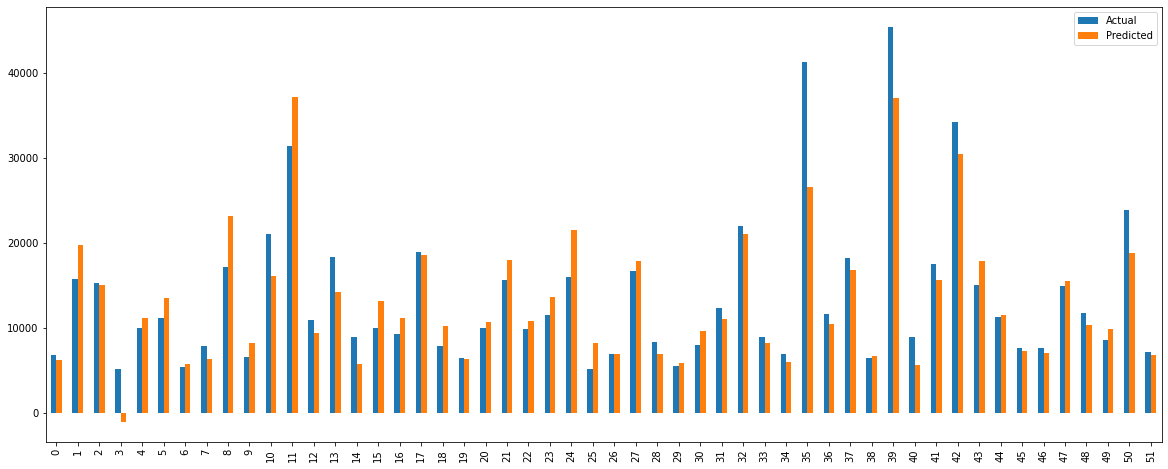

In [32]:
df1.plot(figsize=(20,8), kind='bar')

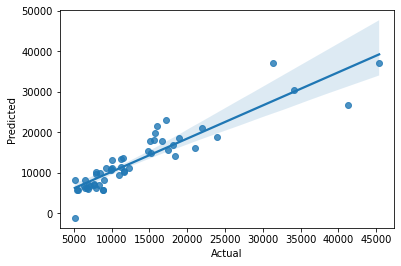

In [33]:
# regression plot using seaborn
import seaborn as sns
sns.regplot(x='Actual', y='Predicted', data=df1)

<Figure size 1296x576 with 0 Axes>

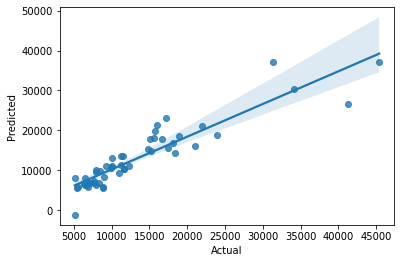

<Figure size 1296x576 with 0 Axes>

In [34]:
sns.regplot(x='Actual', y='Predicted', data=df1)
plt.figure(figsize=(18,8))

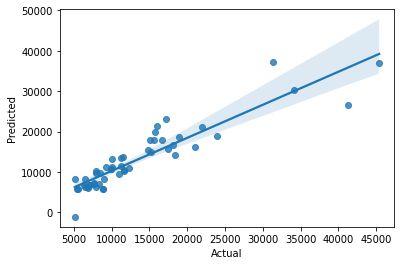

<Figure size 1296x576 with 0 Axes>

In [35]:
sns.regplot(x='Actual', y='Predicted', data=df1)
plt.figure(figsize=(18,8))
plt.show()

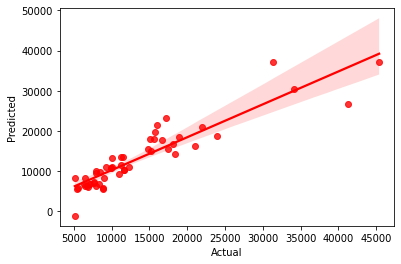

<Figure size 1296x576 with 0 Axes>

In [36]:
sns.regplot(x='Actual', y='Predicted', data=df1, color='red')
plt.figure(figsize=(18,8))
plt.show()

In [37]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8387970914426268